In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the data from CSV into a pandas DataFrame
df = pd.read_csv('all_countries_data.csv')

# Display the first few rows of the DataFrame to understand its structure
print(df.head())

         Updated  Country Year-Week  Source  New Cases  Number Sequenced  \
0  1712154414221  Ireland   2020-01  GISAID          0                 0   
1  1712154414221  Ireland   2020-01  GISAID          0                 0   
2  1712154414221  Ireland   2020-01  GISAID          0                 0   
3  1712154414221  Ireland   2020-01  GISAID          0                 0   
4  1712154414221  Ireland   2020-01  GISAID          0                 0   

   Percent Sequenced  validDenominator             Variant  \
0                  0              True               Other   
1                  0              True        XBB.1.5-like   
2                  0              True  XBB.1.5-like+F456L   
3                  0              True             B.1.351   
4                  0              True           B.1.617.2   

   Detections of Variant  Number Sequenced of Known Variant  Percent Variant  
0                      0                                  0              0.0  
1           

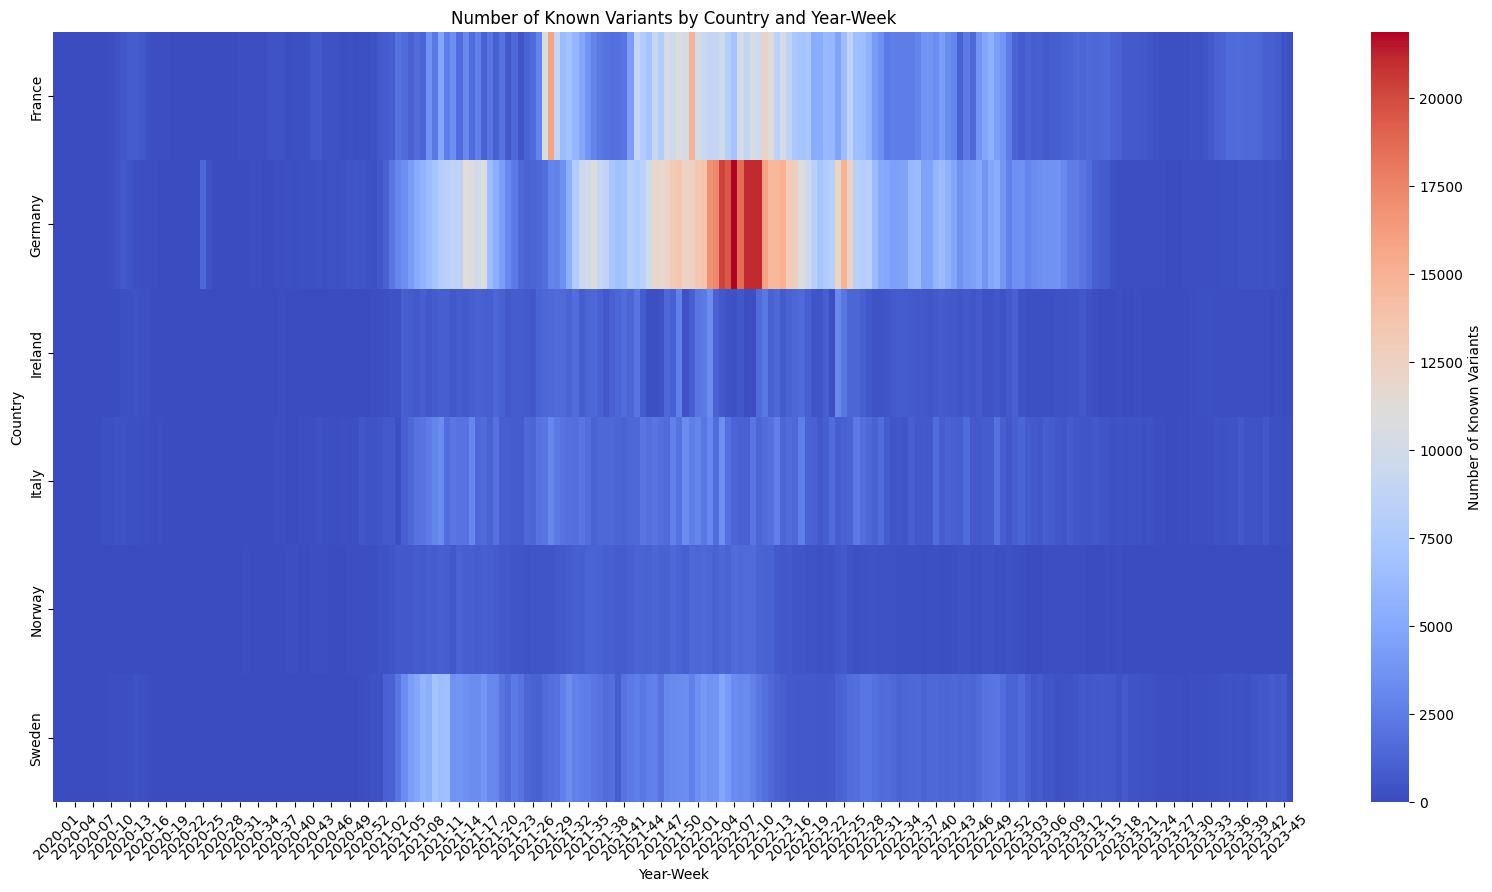

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the CSV data into a DataFrame
data = pd.read_csv('all_countries_data.csv')

# Drop duplicate entries based on 'Country' and 'Year-Week'
data_cleaned = data.drop_duplicates(subset=['Country', 'Year-Week'])

# Pivot the data
heatmap_data = data_cleaned.pivot(index='Country', columns='Year-Week', values='Number Sequenced of Known Variant')

# Set up the heatmap figure
plt.figure(figsize=(20, 10))

# Create the heatmap with 'coolwarm' color map
sns.heatmap(heatmap_data, cmap='coolwarm', cbar_kws={'label': 'Number of Known Variants'})

# Set labels and title
plt.title('Number of Known Variants by Country and Year-Week')
plt.xlabel('Year-Week')
plt.ylabel('Country')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

plt.show()



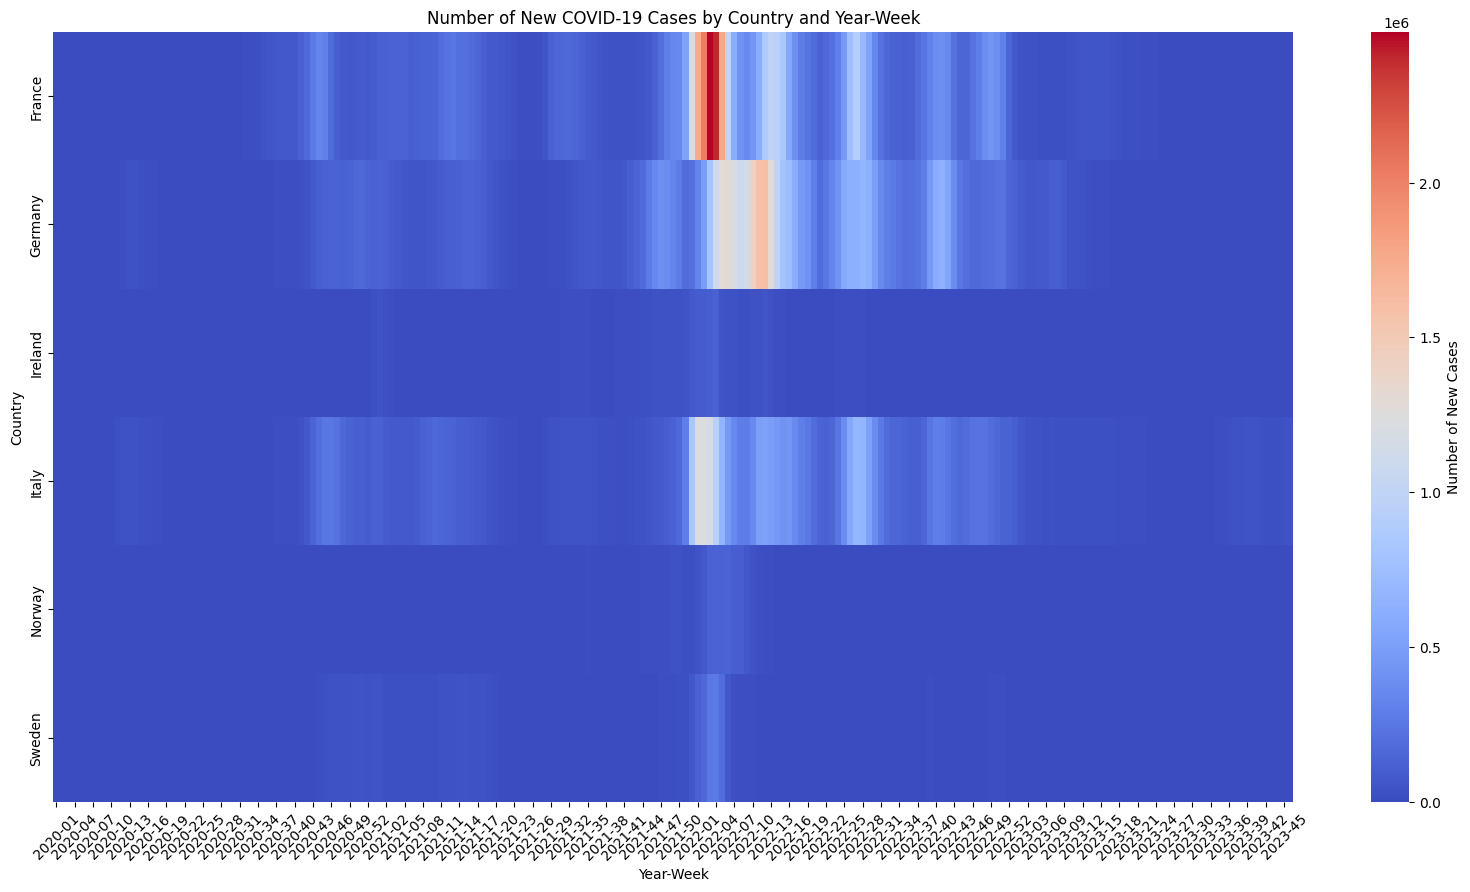

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the CSV data into a DataFrame
data = pd.read_csv('all_countries_data.csv')

# Drop duplicate entries based on 'Country' and 'Year-Week'
data_cleaned = data.drop_duplicates(subset=['Country', 'Year-Week'])

# Pivot the data
heatmap_data = data_cleaned.pivot(index='Country', columns='Year-Week', values='New Cases')

# Set up the heatmap figure
plt.figure(figsize=(20, 10))

# Create the heatmap with 'coolwarm' color map
sns.heatmap(heatmap_data, cmap='coolwarm', cbar_kws={'label': 'Number of New Cases'}, vmin=0)

# Set labels and title
plt.title('Number of New COVID-19 Cases by Country and Year-Week')
plt.xlabel('Year-Week')
plt.ylabel('Country')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

plt.show()



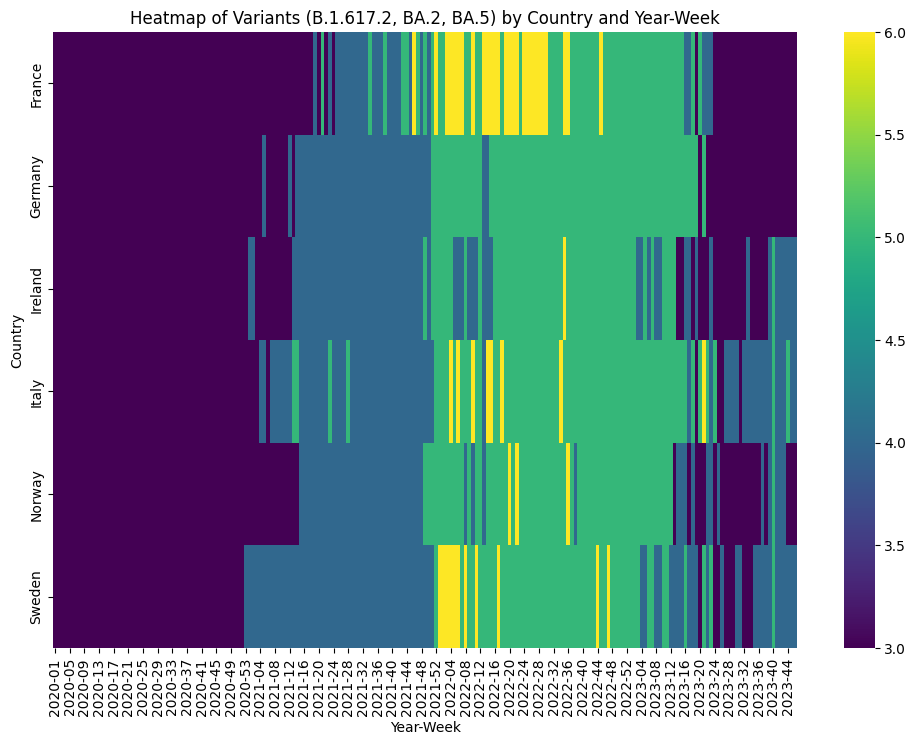

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read the CSV file
df = pd.read_csv('all_countries_data.csv')

# Filter the data based on specified variants
filtered_df = df[df['Variant'].isin(['B.1.617.2', 'BA.2', 'BA.5'])]

# Pivot the dataframe for heatmap
heatmap_data = filtered_df.pivot_table(index='Country', columns='Year-Week', values='Variant', aggfunc='count')

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='viridis')
plt.title('Heatmap of Variants (B.1.617.2, BA.2, BA.5) by Country and Year-Week')
plt.xlabel('Year-Week')
plt.ylabel('Country')
plt.show()
